In [483]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [484]:
df = pd.read_csv('../DataSets/Boston Housing/housing.data', delimiter=r"\s+")
column_names= ['Crime Rate', 'Residential Land Zoned', 'Non-retail Business Acres', 'Charles River Dummy', 'Nitric Oxides Concentration',
              'Rooms per Dwelling', 'Owner Occupied pre1940', 'Weighted Distance to Employment Centres', 'Radial Highway Accessibility Index',
              'Property Tax', 'Pupil Teacher Ratio', 'Blacks', 'Lower Status', 'Median Value']

df.shape
df.columns = column_names

In [485]:
df.head()

,Crime Rate,Residential Land Zoned,Non-retail Business Acres,Charles River Dummy,Nitric Oxides Concentration,Rooms per Dwelling,Owner Occupied pre1940,Weighted Distance to Employment Centres,Radial Highway Accessibility Index,Property Tax,Pupil Teacher Ratio,Blacks,Lower Status,Median Value
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [486]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [487]:
feature_column = 'Rooms per Dwelling'
label_column = 'Median Value'

In [488]:
x = df[feature_column].values.reshape(-1,1)
y = df[label_column].values

In [489]:
# Splits the data and label. returns  train_data, train_label, test_data, test_label
def split_test_train(data,label,ratio):
    train_data = data[0: int(len(data) * ratio)]
    train_label = label[: int(len(label) * ratio)]
    test_data = data[len(train_data):]
    test_label = label[len(train_label):]
    return train_data, train_label, test_data, test_label

In [490]:
x_train, y_train, x_test, y_test = split_test_train(x, y, 0.8)

In [491]:
linear_regression = LinearRegression(fit_intercept= True)

In [492]:
linear_regression.fit(x_train,y_train)

LinearRegression()

In [493]:
y_train_predictions = linear_regression.predict(x_train)
y_test_predictions = linear_regression.predict(x_test)

# Residual Analysis

(-10.0, 50.0)

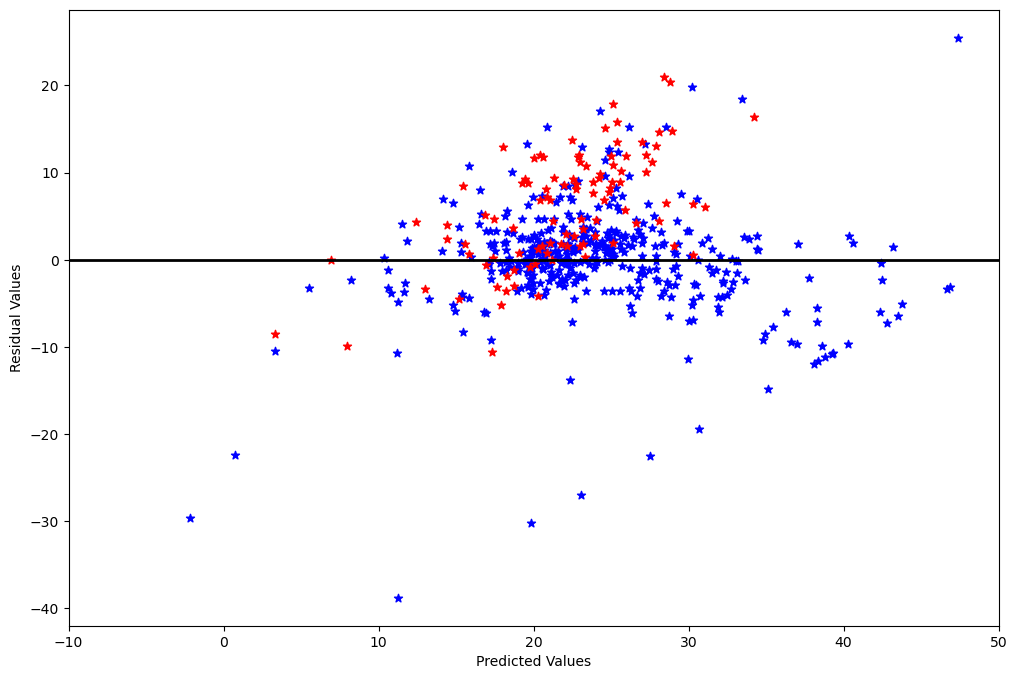

In [494]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_predictions, y_train_predictions - y_train, c='blue', marker='*', label='Training Predictions')
plt.scatter(y_test_predictions, y_test_predictions - y_test, c='red', marker='*', label='Test Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.hlines(y= 0, xmin= -10, xmax= 50, lw= 2, color= 'k')
plt.xlim([-10,50])

# Mean Square Error

In [495]:
from sklearn.metrics import mean_squared_error

In [496]:
def mean_squared_error_manual(labels,predictions):
    sum = 0
    if(len(labels) <= 0 or len(labels) != len(predictions)):
        return None
    for idx,prediction in enumerate(predictions):
        sum = sum + (labels[idx] - prediction) ** 2
    return sum / len(labels)

In [497]:
mean_squared_error_train_manual = mean_squared_error_manual(y_train,y_train_predictions)
mean_squared_error_train_manual

37.91783869074874

In [498]:
mean_squared_error_scikit = mean_squared_error(y_train,y_train_predictions)
mean_squared_error_scikit

37.917838690748745

In [499]:
mean_squared_error_manual_test = mean_squared_error_manual(y_test, y_test_predictions)
mean_squared_error_manual_test

73.92005613122646

In [500]:
mean_squared_error_scikit_test = mean_squared_error(y_test, y_test_predictions)
mean_squared_error_scikit_test

73.92005613122647

# Coefficient of Determination, R^2

R^2 = 1 - SSE / SST

SSE = Sum of Squared Errors

SST = Total Sum of Squares

In [501]:
from sklearn.metrics import r2_score

In [502]:
def average(array):
    return sum(array) / len(array)

def r2_score_manual(labels,predictions):
    sumOfSquaredErrors = 0
    totalSumOfSquares = 0
    average_labels = average(labels)
    if(len(labels) <= 0 or len(labels) != len(predictions)):
        return None
    for idx,prediction in enumerate(predictions):
        sumOfSquaredErrors = sumOfSquaredErrors + (labels[idx] - prediction) ** 2
        totalSumOfSquares = totalSumOfSquares + (labels[idx] - average_labels)  ** 2
    return 1 - (sumOfSquaredErrors / totalSumOfSquares)

In [503]:
r2_score_train_manual = r2_score_manual(y_train, y_train_predictions)
r2_score_train_manual

0.559919298116129

In [504]:
r2_score_train_scikit = r2_score(y_train, y_train_predictions)
r2_score_train_scikit

0.5599192981161291

In [505]:
r2_score_test = r2_score_manual(y_test, y_test_predictions)
r2_score_test

-1.7801705763917277

# Benchmark: A Perfect Model 

In [506]:
generate_random = np.random.RandomState(31)
x_perfect = 10 * generate_random.rand(1000)
y_perfect = generate_random.rand(1) * x_perfect + generate_random.rand(1000)

y_max = max(y_perfect)

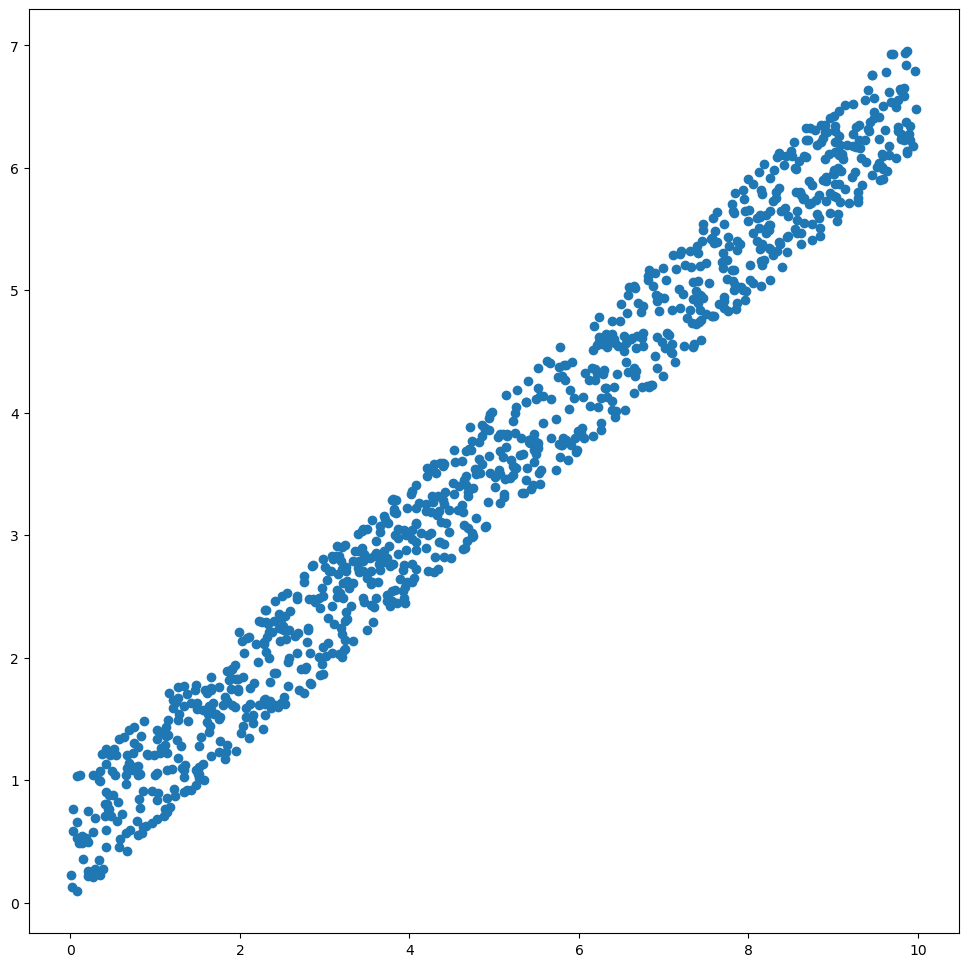

In [507]:
plt.figure(figsize=(12,12))
plt.scatter(x_perfect,y_perfect)

In [508]:
from sklearn.linear_model import LinearRegression

In [509]:
x_perfect_train, y_perfect_train, x_perfect_test, y_perfect_test = split_test_train(x_perfect, y_perfect, 0.8)

In [510]:
x_perfect_train = x_perfect_train.reshape(-1,1)
x_perfect_test = x_perfect_test.reshape(-1,1)

In [511]:
lr = LinearRegression(fit_intercept= True)
lr.fit(x_perfect_train,y_perfect_train)

y_perfect_train_predictions = lr.predict(x_perfect_train)
y_perfect_test_predictions = lr.predict(x_perfect_test)

# Residual Analysis

(0.0, 6.95160347009125)

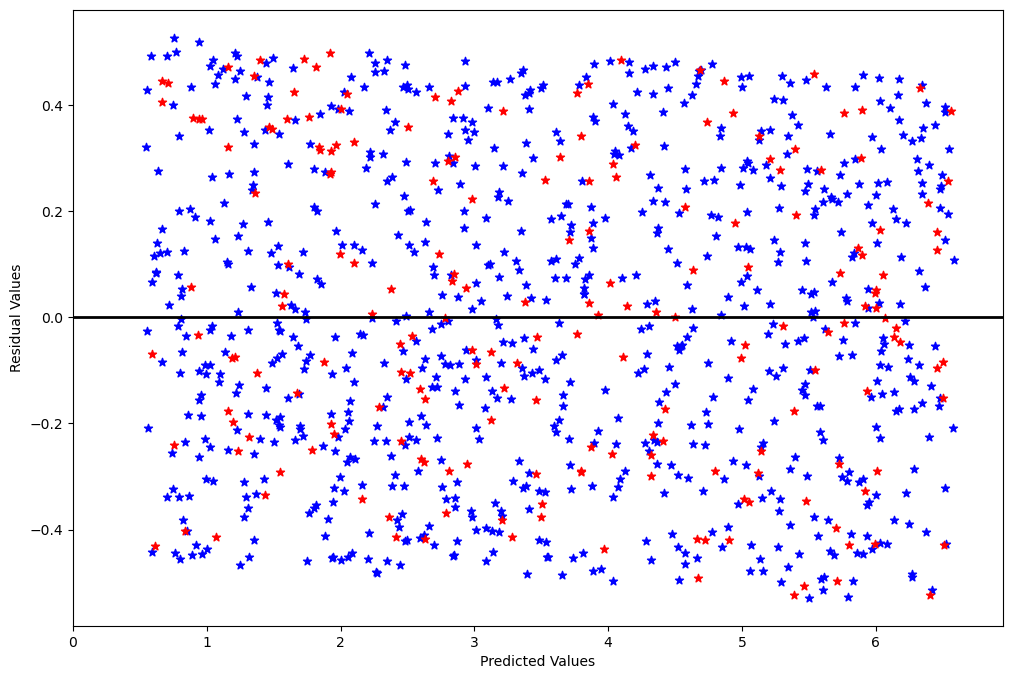

In [512]:
plt.figure(figsize=(12,8))
plt.scatter(y_perfect_train_predictions, y_perfect_train_predictions - y_perfect_train, c='blue', marker='*', label='Training Predictions')
plt.scatter(y_perfect_test_predictions, y_perfect_test_predictions - y_perfect_test, c='red', marker='*', label='Test Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.hlines(y= 0, xmin= -10, xmax= 50, lw= 2, color= 'k')
plt.xlim([0,y_max])

# Mean Squared Error

In [513]:
mean_squared_error_train = mean_squared_error_manual(y_perfect_train,y_perfect_train_predictions)
mean_squared_error_train

0.08370615838521178

In [514]:
mean_squared_error_test = mean_squared_error_manual(y_perfect_test, y_perfect_test_predictions)
mean_squared_error_test

0.08271597955621443

# Coefficient of Determination R^2

In [515]:
r2_score_train = r2_score_manual(y_perfect_train, y_perfect_train_predictions)
r2_score_train

0.9732921875361719

In [516]:
r2_score_test = r2_score_manual(y_perfect_test, y_perfect_test_predictions)
r2_score_test

0.9746082829770861